# **<u>Fighting fire, with data.**

###**Introduction to problem.**
Forest fires can result in absolute devastation, from destroying important wildlife to taking peoples' lives the consequences are almost endless. Its an annual occurence for many, however the impact of climate change can only indicate that the severity of this issue is on the rise. Longer drought periods and increased heat waves only result in higher chances of a disaster taking place. **(reliefweb 2022)**

Algeria is a country located in the north west of Africa, in recent years the fires here have caused immense damage. In fires that happened during 2021 it was found that this years fire damage was higher than all fires in the country from between 2008 to 2020 combined. On top of this at least 90 people died whilst trying to fight the flames. **(Mezahi 2021)**

In Algeria it seems there is a lack of motivation from politicians to really focus on the fight against these fires. This is apparent as none of the five presidential candidates from 2019 had any environmental agendas. **(Mezahi 2021)**

Algeria has little fire fighting resources and on some occasions people have been left to fight with "buckets and branches". **(Mezahi 2021)** With this considered, alongside the fact that authorities aren't making it a priority, we can deduce that there is a lack of funding in this area. It seems the only solution for Algeria's wildfire crisis lies in one that is simple and inexpensive...





###**Proposed soltution.**
The plan of action is to use data science to aid the Algerian people with a proactive solution. This being proactive as data science will hopefully allow us to predict when a fire is going to happen before it does. This is a lot more cost effective than the current reactive solutions that have been implemented as by the time these are put in place the damage is often already done. I will use the data provided by **(Faroudja ABID et al)** to eventually train and build a decision tree model which can predict whether a fire will or will not occur. I am interested in creating two models with a different input of features for each so I can compare their success. This will help create a more useful model in the long run. 

During my exploratory analysis, I will likely split the dataset bewteen observations where fires did and did not occur. This will allow me to gain insight on which features have a significant role in the observations where fires actually occured. I will also change the fire columns' values into 1/0 boolean like variables. With 1 meaning fire and 0 meaning no fire. I believe doing this will make manipulation of data easier when programming solutions.

When evaluating the models, I will create a pair of confusion matrixes. From each matrix I can calculate both models' accuracy which allows me to analyise the performance of each model aswell as compare them effectively. 

### **Properties of the dataset.**
The image below provides some helpful metadata surrounding the dataset. It starts by describing the data as 'multivariate' meaning that each observation has more that one attribute/feature. It then goes on to describe the type of values stored in each observation's feature variables as 'real'. This means every feature's value (except the target label) can be described as a numerical value which is continuous between its individually definded range. It also alludes to the type of supervised machine learning algorithms that are associated with this dataset (supervised as the data has a target variable/label). Finally, it states the following information: The no observations/instances, the no attributes/features, the area of research, the date that this data was donated and finally the number of web hits it has.

**Dataset properties/metadata**

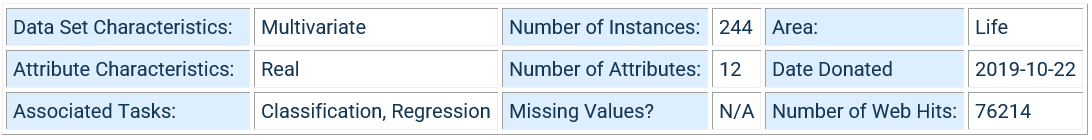

**(UCL Machine Learning Repository, 2019).**

The number of features is acctually 13, the 'day', 'month' and 'year' features in the figure above are conceptualized as just one 'date' feature. Some pre processing has been done which essentially breaks this 'date' feature out into two 'day' and 'month' features. This was done as all of the samples were taken in the same year which makes the 'year' feature essentially redundant. 




### **Description of dataset's features.**
The features in the following table are all weather components along with the day and month they were measured on.

**Fire Weather Observations.**
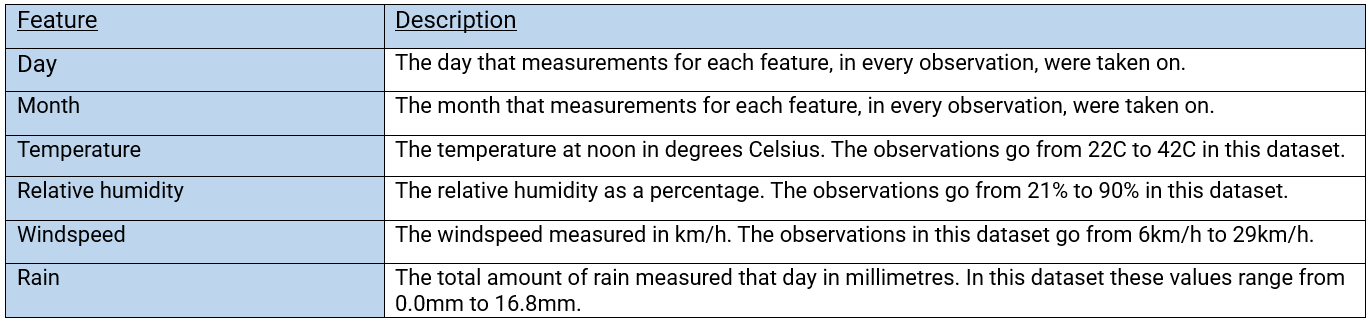

Relative humidity can be broken down a little more (OxfordLanguages 2023) defines it as the amount of water vapour present in air expressed as a percentage of the amount needed for saturation at the same temperature.

The features in this table below are all fuel moisture codes. Their readings rely soley on the Fire Weather Observations in the table above. None of them are measured in any particular unit.

**Fuel Moisture Codes.**
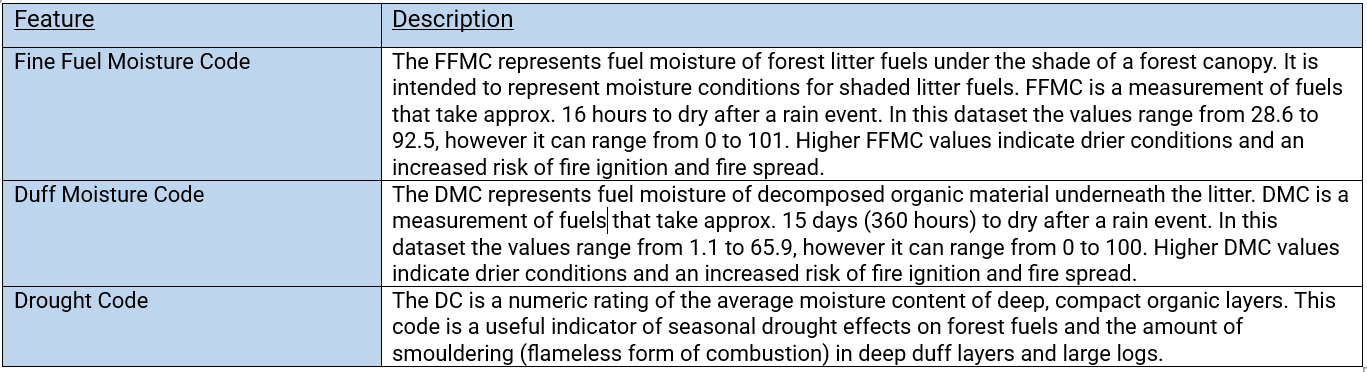

DC is a measurement of fuels that take approx 53 days (1272 hours) to dry after a rain event.
DC can have a maximum value of 1000 in very long drought periods. In this dataset it ranges from 7 to 220.4

The features in this table below are all Fire behaviour Indicies. Their readings all rely soley on the Fire Weather Observations and/or the fuel moisture codes in the table(s) above. None of them are measured in any particular unit.

**Fire behaviour Indices.**
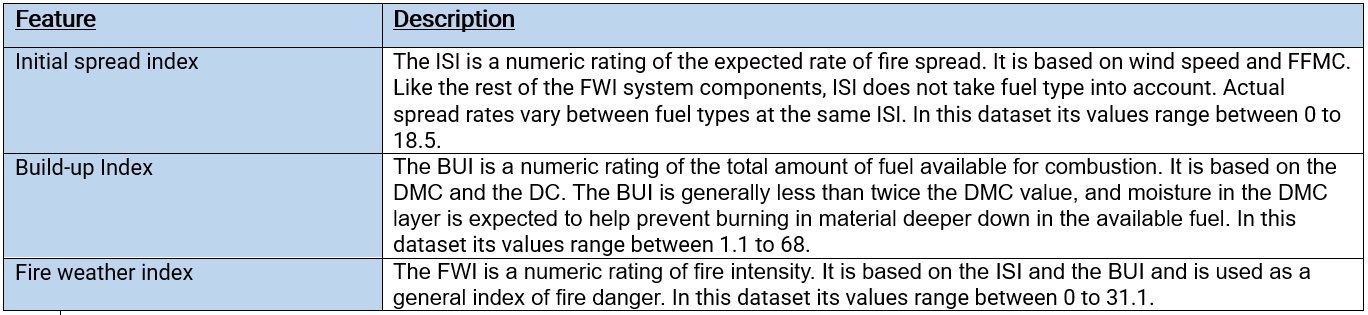

All the information in the above tables has been sourced from (Natural resources Canada 2023) and (National wildfire coordinating group 2023).

Every table above gives each feature in the datset (except the target variable) a description of itself and its role in the fire weather index system. This system was first introduced in the 1970s by the Canadian forestry service. 
The system consists of six components: three primary subindexes representing fuel moisture, two intermediate subindexes representing rate of spread and fuel consumption, and a final index representing fire intensity. All six of these components can be seen in the fuel moisture and fire behaviour tables above. The structure of the FWI system can be well illustrated by the process flow chart provided by (National wildfire coordinating group 2023).

FWI process flow chart

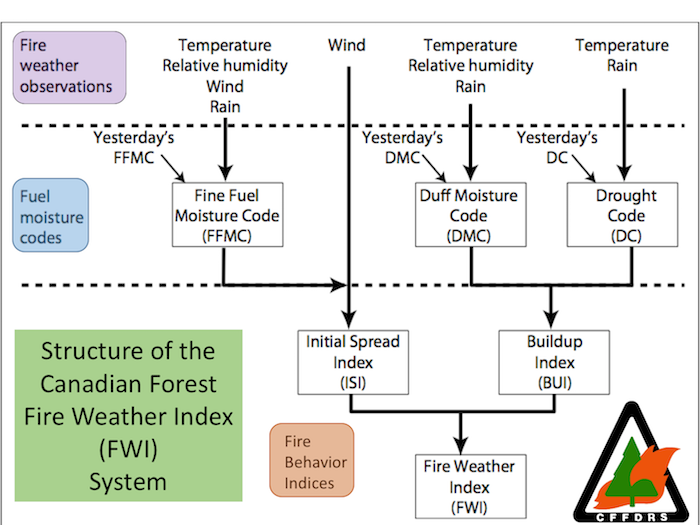

The fire weather observations are the inputs of the system. The fuel moisture codes alongside the fire behaviour indicies are the outputs of the system. To conclude, the observations in this dataset consist of all elements in the fire weather index system. The final feature to mention is the target variable. This feature is categorical and states whether a fire did or not not occur when the observation was taken.  

### **Is the sample representative?**
The Final thing I wanted to check was the quality of the representative sample. Upon my preliminary scanning of the csv file I saw that there was in fact a sample taken for everyday of the fire season (beggining of June to the end of September) for both the bajaja and Sidi Bel-abbes regions. In light of this I am confident that my model will be built off of well represented data.

### **Exploratory data analysis.**
Below are the imported libraries that I will use in my code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display
from pandas.plotting import scatter_matrix
import sklearn as skl
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, silhouette_score

### **Pre-processing and initial thoughts.**
During my initial scan of the "ForestFire.csv" I noticed that there were no column headings. In the code below I start off by defining a new dataframe and pass in the dataset along with a new list of column headings via the pandas "read_csv" method.   

In [2]:
#defining the column names as none have been pre-defined in the csv file.

columns = ['day', 'month', 'temperature', 'rh', 'ws',
           'rain', 'ffmc', 'dmc', 'dc', 'isi',
           'bui', 'fwi', 'fire']

#using the names parameter to assign the column names to the dataset

forest_fire_data = pd.read_csv("ForestFire.csv", names=columns)

Many statistical methods don't immeadiately work when they encounter categorical variables. In this dataset, the fire column contains either "fire" or notfire". To make things more expressly clear for algorithms sake I have changed the observations with "fire" to just 1 and the observations with "notfire" to just 0. This change to the dataset is shown in the code below.

In [3]:
# Replace the "fire" and "not fire" values in the "fire" column with 1s and 0s
forest_fire_data['fire'] = forest_fire_data['fire'].replace({'fire': 1, 'notfire': 0})

The code below shows a Quick view of the dataset. The new column headings alongside the edited fire column can now be seen in their new state. 

In [4]:
forest_fire_data

,day,month,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,fire
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


Here I split the data up into two dataframes: One with observations where fires have occurred and one where they have not. This can help me gain insight from observations when fires have actually occurred. 

In [5]:
fire_data = forest_fire_data[forest_fire_data['fire'] == 1]
no_fire_data = forest_fire_data[forest_fire_data['fire'] == 0]

Pandas' describe method shows us all the basic descriptive statistics about 'fire_data'. These statistics will hopefully give me some direction into which features do and do not have influence on fire occurrence.

In [6]:
fire_data.describe()

,day,month,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,fire
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,17.335766,7.525547,33.795620,56.416058,15.321168,0.096350,87.535036,21.051825,70.816788,7.423358,24.017518,11.732847,1.0
std,8.232180,0.978296,2.923381,14.232648,2.307068,0.544276,3.354181,12.522463,48.804396,3.695292,14.381866,6.824427,0.0
min,2.000000,6.000000,26.000000,21.000000,8.000000,0.000000,80.200000,3.400000,9.700000,2.600000,5.100000,1.700000,1.0
25%,10.000000,7.000000,32.000000,45.000000,14.000000,0.000000,85.300000,12.100000,34.100000,4.700000,13.700000,6.300000,1.0
50%,18.000000,8.000000,34.000000,56.000000,15.000000,0.000000,87.800000,18.000000,54.200000,6.800000,19.200000,10.500000,1.0
75%,24.000000,8.000000,36.000000,66.000000,17.000000,0.000000,89.400000,25.800000,96.800000,9.200000,30.400000,15.700000,1.0
max,31.000000,9.000000,42.000000,88.000000,21.000000,6.000000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.0


###**Points of interest from ".describe".**

*   137 fires were recorded out of the 244 observations in total. - Shows us that fires occurred for over half of the summer.
*   The average rainfall for observations when a fire occurred was extremly close to zero. - Bar from a few outliers, fires did not occur when it rained at all.
* For observations when a fire occurred, the day feature seems to have little influence. - The min, max and percentile statistics suggest a relatively even spread of fires throughout all days of the month.
* The average FFMC readings were very high in observations where fire occurred. - A high FFMC reading considerably increases the risk of potential fire. 
* Fires did not occur when temperatures dropped below 26C°. - Shows that fires don't start unless the temperature reaches a certain threshold.
* The maximum windspeed was 21km/h in observations where fire was recorded. - It is possible that wind speeds might reach a point where they are too high to allow for the ignition of fires.
* 75% of the observations when fire occurred were in the months before September. - Begs the question: Which month saw the most fires?
* 75% of the observations when fire occurred had a relative humidity of less than 67%. - If the atmostphere is too humid it becomes difficult for fires to ignite. 

###**Visualisations from points of interest.**
The insight I gained from the descriptive statistics has directed me to my next point of investigation: Does the month aswell as the windspeed have a strong link to fires? These are questions I wasn't immeadiately able to answer with just the statistics above. My goal is to build a model that accurately predicts forest fires. One avenue of ensuring this is investigating which features have a strong influence on whether fires occur. 

### **Code for fires per month bar chart.**

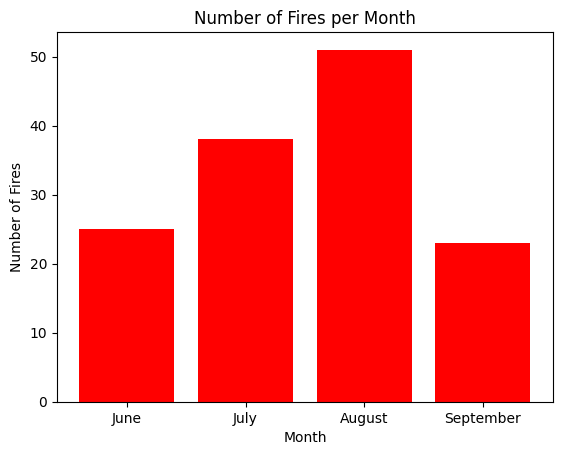

In [7]:
# Group the data by month and count the number of fires in each month
fires_per_month = fire_data.groupby('month')['fire'].count()

# Creates a bar chart of the fires per month
plt.bar(fires_per_month.index, fires_per_month.values, color='red')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.title('Number of Fires per Month')


# Set the x-axis tick locations and labels
xticks = [6, 7, 8, 9]
xtick_labels = ['June', 'July', 'August', 'September']  # new labels
plt.xticks(xticks, xtick_labels)

# Show the chart
plt.show()

The "fires per month" bar chart clearly shows that August saw the most fires and that September saw the least. This visualisation has helped me realise that the Month feature does actually have some weight to it. Originally I would've assumed that it wouldn't have much of an effect.

### **Code for windspeed vs fire line chart.**

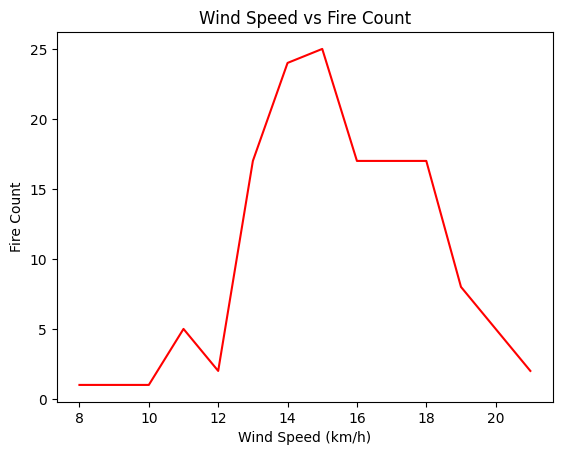

In [8]:
# Extract the windspeed and fire count columns
windspeed_column = fire_data['ws']
fire_column = fire_data['fire']

# Group the data by windspeed and count the number of fires in each windspeed value
fire_column_by_windspeed = fire_column.groupby(windspeed_column).sum()

# Create a line graph
plt.plot(fire_column_by_windspeed.index, fire_column_by_windspeed, color='red')

# Add labels and title to the chart
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Fire Count')
plt.title('Wind Speed vs Fire Count')

# Display the chart
plt.show()

The "wind speed vs fire count" line graph gives us some interesting insights. I can infer that forest fires have an optimum windspeed of 15km/h. Simultaneously, values lower and higher than this show gradually less occurences of fire. This helps me realise that the windspeed feature definitely has some influence over the occurence of fires. 

### **Feature correlation to target variable.**
The correlation matrix below shows all of the features against the target variable (fire or not). Each number shows the correlation co-efficient. +1 is at the top of the positive correlation scale while -1 is at the top of the negative correlation scale. 0 indicates no correlation between variables. A feature with strong positive correlation (i.e higher positive values) indicates more risk of a fire. A feature with strong negative correlation (i.e higher negative values) indicates less risk of fire.     

In [9]:
# Compute the correlation matrix
corr_matrix = forest_fire_data.corr()['fire']
print(corr_matrix)

day            0.202840
month          0.024004
temperature    0.516015
rh            -0.432161
ws            -0.069964
rain          -0.379097
ffmc           0.769492
dmc            0.585658
dc             0.511123
isi            0.735197
bui            0.586639
fwi            0.719216
fire           1.000000
Name: fire, dtype: float64


The fire behaviour indicies (ISI, BUI and FWI) seem to have the strongest correlation with the 'fire' target variable. From my research into the features' properties this doesn't come as a surprise to me. These features in particular are a sort of output from the FWI system and would initially be used to help predict the risk of fire.       

### **Choice the Model.**
The choice of model I will be going for is a decision tree. This type of model is suitable for binary classification problems. In this type of problem, the goal is to use the inputs of a model to predict a certain class of output. In regard to this dataset this would be the fire weather observations and, whether a fire will take place, respectively.

Listed below is some additional reasoning for the use of a decision tree:


* This dataset involves many complex, non-linear realtionships between each feature. Decision trees are good at capturing these relationships making it a suitable model for this task and its data.
* Decision trees are interpretable. They can be easily visualised as the tree structure makes it clear as to how the model is making its decisions. 


**Description of a decision tree.**

The way in which a decision tree works is that it will recursively partition the data into many subsets. My data will be split based upon off of each feature's importance in regard to the prediction of forest fires. Once this process is complete we are left with a model that has a tree-like structure to it. Each branch has a condition which determines the next branch to go down. Finally, each leaf of the tree represents a prediction which is based off of the branches that have been traversed.    

### **Feature selection.**
My exploratory analysis has shown me that practically all of the features in my data can help me in predicting forest fires. I will however be removing the 'day' feature. this didn't seem to have any real influence on whether there was a fire or not. Decision trees benefit from the elimination of redundant features as it reduces the risk of overfitting the model to the data.


### **Building the model.**
Firstly, I will split the data into a feature and label frame. This is so the model can identify what it is we are trying to predict. 

In [10]:
forest_fire_features = forest_fire_data.drop(labels= "fire", axis= 1) 
forest_fire_labels = forest_fire_data['fire']

I will also drop the day feature as mentioned earlier.

In [11]:
forest_fire_features.drop(labels= "day", axis= 1)

,month,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...
238,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
239,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
240,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
241,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


Next, I will partition the data into training and testing data. I can do this using the 'train_test_split' method from the sklearn library. 

In [12]:
#training the model on 80% of the data
#testing the model on 20% of the data - this is why test_size = 0.2  
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(forest_fire_features, forest_fire_labels, test_size= 0.2)

Now I will instantiate a decision tree classifier object.

In [13]:
fire_or_not_classifier = skl.tree.DecisionTreeClassifier()

Here I am fitting the classifier to my training data. The '.fit' method returns the decision tree model.

In [14]:
fire_or_not_classifier = fire_or_not_classifier.fit(X_train, y_train)

The model is now complete. The 'export_text' method from sklearn allows us to visualise the tree model, this is shown in the code below.

In [15]:
fire_or_not_tree = export_text(fire_or_not_classifier, feature_names= list(X_train.columns))
print(fire_or_not_tree)

|--- ffmc <= 80.15
|   |--- class: 0
|--- ffmc >  80.15
|   |--- isi <= 2.65
|   |   |--- temperature <= 30.50
|   |   |   |--- class: 1
|   |   |--- temperature >  30.50
|   |   |   |--- class: 0
|   |--- isi >  2.65
|   |   |--- class: 1



### **Evaluation of Model.**
The classifier's 'predict' method uses the decision tree to predict the labels of the test data.

In [16]:
#returns an array of 1/0 integer predictions (fire not fire, respectively)
fire_model_predictions = fire_or_not_classifier.predict(X_test)

Both the true labels from the test data ('y_test') and the predictions from the code above, allow me to create a confusion matrix. This is shown in the code below.

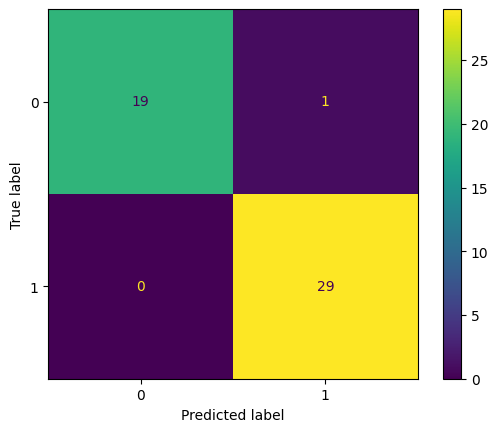

In [17]:
#building the confusion matrix
fire_tree_confusion_matrix = confusion_matrix(y_test, fire_model_predictions)
#displaying the confusion matrix
ConfusionMatrixDisplay(fire_tree_confusion_matrix).plot()

In [18]:
print(accuracy_score(y_test, fire_model_predictions))

0.9795918367346939


### **Discusion of results.**
The model above includes the features: FFMC, ISI, month and temperature. This is only four of the eleven features used to train the model. There are many possible reasons for why the model could be built like this. A predominant one could be that much of the information provided by the ignored features may already be captured by the features shown in the model. A good example of this could be the 'FFMC' - this feature is built upon the rain, rh, wind and temperature. For this reason, the model could be deeming many of the weather observations as rendundant which is why they are left out. 

The results from 'accuracy_score' and the confusion matrix above clearly show that the model is 100% accurate. However, this is only in regard to predicting the labels in the test data. I wouldn't assume that the model is 100% accurate at predicting all forest fires.

My model has been successful in predicting fires for 49 different weather obeservations. With that said, the real number of possible weather observations is infinite. It seems fair to say that the model is useful, but not completely accurate in all circumstances.  

Irregardless of any doubt, with such a good score I felt that the journey of building the model was succesful. However, i'm still interested in knowing if the informed decisions I made earlier (exploratory analysis) held any real value.

The figures below show the results of the model when the 'day' feature is still incoorporated into the dataset.   

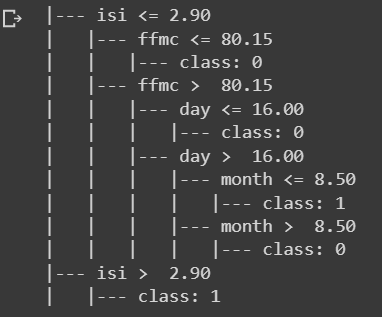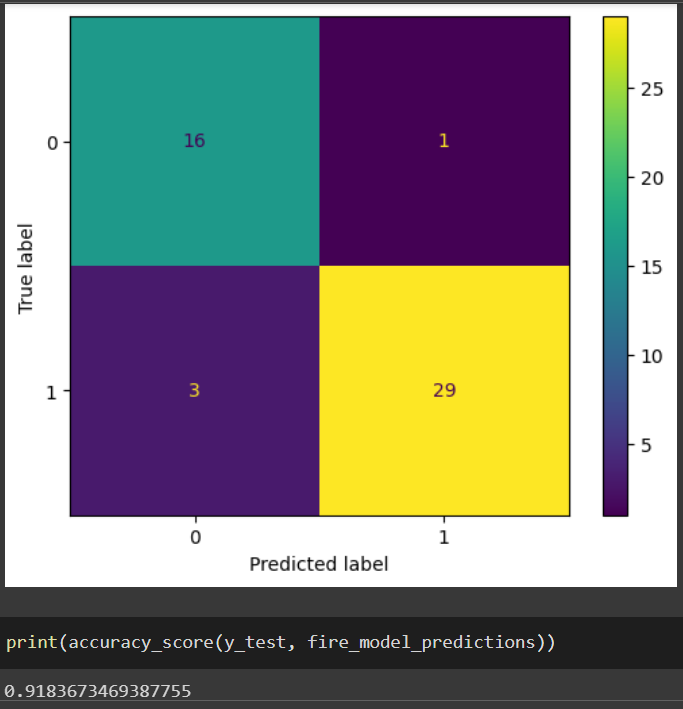

### **Comparison between models.**
The results shown here present a less accurate model of around 92% accuracy. It gives me confidence that I made the right decision in removing the 'day' feature before building the final model. The reduction in accuracy is likely due to fact that the model was overfitted to the data. Redundant features like the 'day' are likely responsible. This was the idea I alluded to in my hypothesis when removing the feature.

**Properties of results**


*   Model without 'day' feature - In this decision tree the features involved are: FFMC, ISI, month and temprature. 
*   Model with 'day' feature - In this decision tree the features involved are: FFMC, ISI, month and day.
* Common features between both models: FFMC, ISI and month.
* Feature differences between models: 'temperature' in the first model, 'day' in the second model.

From my exploratory analysis and general research it is clear that the 'day' is significantly less important than the 'temperature' when predicting fires.
The reduction in accuracy in the second model isn't surprising. The fact that it includes the day over the temperature just seems absurd, even to the lay person. 



### **Conclusion.**
At the beggining of this journey, I set out to provide the Algerian people with a proactive solution to their forest fire crisis. Using the new found wonders of data science I managed to succesfully build a model with '100%' accuracy. I believe that it was the informed decisions I made which lead me to building such an accurate model. These informed decisions were a product of in-depth analysis that allowed me to realise each feature's importance in predicting forest fires. 

My model was 100% accurate at predicting fires for 49 unseen data observations. Although this presents some real value as a prediction model it certainly does not mean that the model is completely robust. I really am interested in seeing how this model would perform with completely new data. It's very possible that the model would not peform well as it might struggle to generalise with new, unseen data. One idea I did have, that would help in solving this problem, was regularisation. The idea that adjusting the model's hyperparameters would provide us with a simpler yet more effective version of itself. In addition to this, I also found that regularisation techniques can help prevent a model from overfitting to its training data. I got a real first hand view of what overfitting looks like and its negative effects. This was when I was comparing the models that did and did not have the day feature included, where the second model came out nearly 10% less accurate. For these reasons, if there were more time available, I would look into a range of different regularisation techniques to improve my model.

Overall, I believe that my model could provide some serious aid to people in Algeria and other places like it. By attempting to predict a problem before it occurs people can steer clear of disaterous consequences.

**Further thoughts.**

I believe that there are an infinite amount of innovative solutions to this type of problem, especially when applying computer/data science techniques. A website from (Berkley computing, data science and society, 2023) presented the idea of using data to create a fire's "digital double". It would help predict a huge amount of information about fire behaviour making it extremely useful for avoiding disasters. It's fascinating ideas like these that help prevent and manage such grave crises. 





### **References**


*   ReliefWeb. 2022. ‘Forest Fires in Algeria - Situation Report, September 3, 2022 - Algeria | ReliefWeb’. Reliefweb. Retrieved 12 April 2023 (https://reliefweb.int/report/algeria/forest-fires-algeria-situation-report-september-3-2022).

*   NWCG 2023. ‘NWCG | NWCG Is an Operational Group Designed to Coordinate Programs of the Participating Wildfire Management Agencies.’ Retrieved 24 April 2023 (https://www.nwcg.gov/).

* OxfordLanguages 2023. ‘Oxford Languages | The Home of Language Data’. Retrieved 24 April 2023 (https://languages.oup.com/).

* CanadianGovernment 2023, Natural Resources. n.d. ‘Canadian Wildland Fire Information System | Canadian Forest Fire Weather Index (FWI) System’. Retrieved 16 April 2023 (https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi).

* Faroudja ABID et al. n.d. ‘UCI Machine Learning Repository: Algerian Forest Fires Dataset Data Set’. Retrieved 12 April 2023 (https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++).

* Leven, Rachel. n.d. ‘Computing and Data Sciences Improve What We Know about Wildfires and How to Fight Them | CDSS at UC Berkeley’. Retrieved 10 April 2023 (https://data.berkeley.edu/news/computing-and-data-sciences-improve-what-we-know-about-wildfires-and-how-fight-them).

* Mezahi, Maher. 2021. ‘Algeria’s Desperate Wildfire Fight: Buckets and Branches’. BBC News, August 21.